<a href="https://colab.research.google.com/github/hrbolek/learning/blob/master/%20learning/operanalyst/fuzzylogic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fuzzy logické systémy

## Booleova algebra

Booleova algebra předpokládá, že každý výrok je buď pravdivý nebo nepravdivý.
Číslo X je buď rovno 0 nebo není. Žádné "mezihodnoty" neexistují.

Možné logické proměnné jsou tedy `True` a `False`

Pravdivostní tabulka pro operátor AND

| X | Y | (X and Y)|
|:-:|:-:|:----:|
| 0 | 0 |   0  |
| 0 | 1 |   0  |
| 1 | 0 |   0  |
| 1 | 1 |   1  |

Pravdivostní tabulka pro operátor OR

| X | Y | (X or Y)|
|:-:|:-:|:----:|
| 0 | 0 |   0  |
| 0 | 1 |   1  |
| 1 | 0 |   1  |
| 1 | 1 |   1  |


In [1]:
def createBoolTest(trueValue, falseValue):
    def test(func):
        print(func)
        print('True\tTrue\t', func(trueValue)(trueValue) == trueValue)
        print('False\tTrue\t', func(falseValue)(trueValue) == trueValue)
        print('True\tFalse\t', func(trueValue)(falseValue) == trueValue)
        print('False\tFalse\t', func(falseValue)(falseValue) == trueValue)
    return test

In [2]:
boolTest = createBoolTest(True, False)
def And(a):
    def AndAnd(b):
        return a & b
    return AndAnd

def Or(a):
    def OrOr(b):
        return a | b
    return OrOr

boolTest(Or)
print('-'*10)
boolTest(And)

<function Or at 0x7f7609ce5050>
True	True	 True
False	True	 True
True	False	 True
False	False	 False
----------
<function And at 0x7f760e72bcb0>
True	True	 True
False	True	 False
True	False	 False
False	False	 False


## Fuzzy algebra

Fuzzy algebra předpokládá, že každá hodnota na intervalu $<0;1>$ je možnou / přípustnou hodnotou.

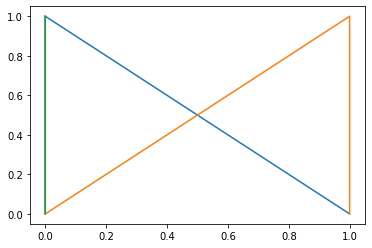

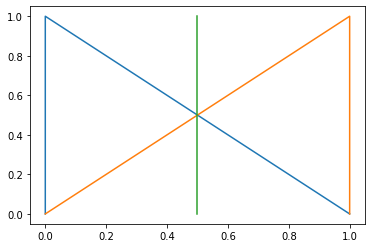

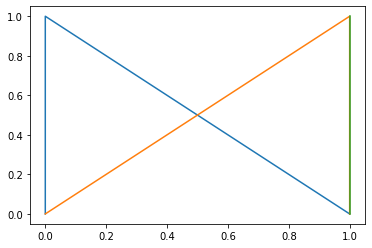

In [7]:
import matplotlib.pyplot as plt

def plotFuzzyVariable(value):
    plt.plot([0, 0, 1, 1], [0, 1, 0, 0])
    plt.plot([0, 0, 1, 1], [0, 0, 1, 0])
    plt.plot([value, value], [0, 1])
    plt.show()

plotFuzzyVariable(0)
plotFuzzyVariable(0.5)
plotFuzzyVariable(1)

In [10]:
def fuzzyAnd(a):
    def fuzzyAndAnd(b):
        return min(a, b)
    return fuzzyAndAnd

def fuzzyOr(a):
    def fuzzyOrOr(b):
        return max(a, b)
    return fuzzyOrOr

boolTest = createBoolTest(1, 0)

boolTest(fuzzyOr)
print('-'*10)
boolTest(fuzzyAnd)


<function fuzzyOr at 0x7f760517a290>
True	True	 True
False	True	 True
True	False	 True
False	False	 False
----------
<function fuzzyAnd at 0x7f760517ac20>
True	True	 True
False	True	 False
True	False	 False
False	False	 False


In [11]:
boolTest = createBoolTest(0.3, 0.7)

boolTest(fuzzyOr)
print('-'*10)
boolTest(fuzzyAnd)

<function fuzzyOr at 0x7f760517a290>
True	True	 True
False	True	 False
True	False	 False
False	False	 False
----------
<function fuzzyAnd at 0x7f760517ac20>
True	True	 True
False	True	 True
True	False	 True
False	False	 False


In [12]:
boolTest = createBoolTest(0.49, 0.51)

boolTest(fuzzyOr)
print('-'*10)
boolTest(fuzzyAnd)

<function fuzzyOr at 0x7f760517a290>
True	True	 True
False	True	 False
True	False	 False
False	False	 False
----------
<function fuzzyAnd at 0x7f760517ac20>
True	True	 True
False	True	 True
True	False	 True
False	False	 False
